# INDIAN CUISINES WITH INGREDIENTS

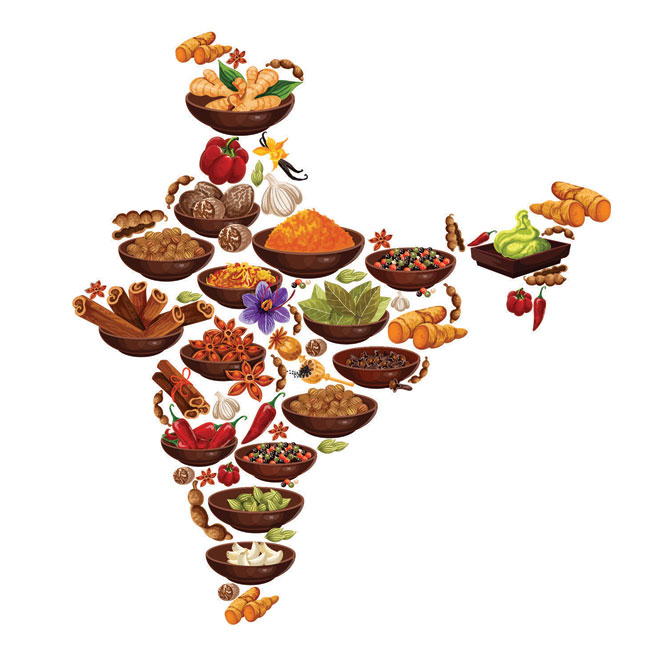

# IMPORTING USEFUL LIBRARIES AND READING FILE

In [160]:
import pandas as pd
import numpy as np
import seaborn as snb
import matplotlib.pyplot as plt
import statistics as st

In [128]:
# reading csv
df = pd.read_csv(r"C:\Users\Admin\Desktop\indian_food.csv")

# ABOUT DATA

In [129]:
#first five records of our dataset
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


In [130]:
#rows and columns 
print("Number of rows are :",df.shape[0])
print("Number of columns are : ",df.shape[1])

Number of rows are : 255
Number of columns are :  9


In [131]:
#column names
df.columns

Index(['name', 'ingredients', 'diet', 'prep_time', 'cook_time',
       'flavor_profile', 'course', 'state', 'region'],
      dtype='object')

In [132]:
#data type of each column
df.dtypes

name              object
ingredients       object
diet              object
prep_time          int64
cook_time          int64
flavor_profile    object
course            object
state             object
region            object
dtype: object

In [133]:
#checking for null values
df.isnull().sum()

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            1
dtype: int64

**OBSERVATION - We have one null value present in region column**

In [134]:
#distinct number of values in each column
df.nunique()

name              255
ingredients       252
diet                2
prep_time          22
cook_time          19
flavor_profile      5
course              4
state              25
region              7
dtype: int64

In [135]:
#Analysing unique values in few relevant columns
cols= ["diet","prep_time","cook_time","flavor_profile","course","state","region"]
for i in cols:
    print(i,df[i].unique(), sep="\n")  

diet
['vegetarian' 'non vegetarian']
prep_time
[ 45  80  15  10  20   5  30  -1  40  25 480 180 240 120  60 500 150 360
 495  70  35  12]
cook_time
[ 25  30  60  40  50  20   5  45 120  35  90  75  15 720  55  -1  10   2
   6]
flavor_profile
['sweet' 'spicy' 'bitter' '-1' 'sour']
course
['dessert' 'main course' 'starter' 'snack']
state
['West Bengal' 'Rajasthan' 'Punjab' 'Uttar Pradesh' '-1' 'Odisha'
 'Maharashtra' 'Uttarakhand' 'Assam' 'Bihar' 'Andhra Pradesh' 'Karnataka'
 'Telangana' 'Kerala' 'Tamil Nadu' 'Gujarat' 'Tripura' 'Manipur'
 'Nagaland' 'NCT of Delhi' 'Jammu & Kashmir' 'Chhattisgarh' 'Haryana'
 'Madhya Pradesh' 'Goa']
region
['East' 'West' 'North' '-1' 'North East' 'South' 'Central' nan]


**OBSERVATION - We have -1 in many columns which doesnot makes sense**

In [136]:
#descriptive statistics of numerical data types
df.describe()

,prep_time,cook_time
count,255.000000,255.000000
mean,31.105882,34.529412
std,72.554409,48.265650
min,-1.000000,-1.000000
25%,10.000000,20.000000
50%,10.000000,30.000000
75%,20.000000,40.000000
max,500.000000,720.000000


**OBSERVATION - MIN value of -1 also indicates the same problem**

In [137]:
#description for non-numerical data
df.describe(include=object)

,name,ingredients,diet,flavor_profile,course,state,region
count,255,255,255,255,255,255,254
unique,255,252,2,5,4,25,7
top,Balu shahi,"Gram flour, ghee, sugar",vegetarian,spicy,main course,Gujarat,West
freq,1,2,226,133,129,35,74


# DATA CLEANING

# 1. FIXING NULL VALUES

In [138]:
#checking for other rows with state Uttar Pradesh
df[df["state"]=="Uttar Pradesh"]

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
6,Jalebi,"Maida, corn flour, baking soda, vinegar, curd,...",vegetarian,10,50,sweet,dessert,Uttar Pradesh,North
13,Petha,"Firm white pumpkin, sugar, kitchen lime, alum ...",vegetarian,10,30,sweet,dessert,Uttar Pradesh,North
15,Rabri,"Condensed milk, sugar, spices, nuts",vegetarian,10,45,sweet,dessert,Uttar Pradesh,North
18,Sohan halwa,"Corn flour, ghee, dry fruits",vegetarian,10,60,sweet,dessert,Uttar Pradesh,North
90,Kachori,"Moong dal, rava, garam masala, dough, fennel s...",vegetarian,30,60,spicy,snack,Uttar Pradesh,North
95,Kofta,"Paneer, potato, cream, corn flour, garam masala",vegetarian,20,40,spicy,main course,Uttar Pradesh,North
97,Lauki ke kofte,"Bottle gourd, garam masala powder, gram flour,...",vegetarian,20,40,spicy,main course,Uttar Pradesh,North
105,Navrattan korma,"Green beans, potatoes, khus khus, low fat, gar...",vegetarian,25,40,spicy,main course,Uttar Pradesh,North
110,Panjeeri,"Whole wheat flour, musk melon seeds, poppy see...",vegetarian,10,25,sweet,dessert,Uttar Pradesh,NaN


In [139]:
#replacing the null with actual value that should have been there---NORTH
df["region"].replace(np.nan,"North",inplace=True)

In [140]:
#Verification of replacement
df.isnull().sum()

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            0
dtype: int64

# 2. FIXING IRRELEVANT VALUES (-1)

**Columns where negative value is irrelevant 
prep_time, cook_time, flavor_profile, state, region**

In [141]:
#conditional statement with & operator
df[(df["state"]=="-1") & (df["region"]=="-1")]

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
7,Kaju katli,"Cashews, ghee, cardamom, sugar",vegetarian,10,20,sweet,dessert,-1,-1
9,Kheer,"Milk, rice, sugar, dried fruits",vegetarian,10,40,sweet,dessert,-1,-1
10,Laddu,"Gram flour, ghee, sugar",vegetarian,10,40,sweet,dessert,-1,-1
12,Nankhatai,"Refined flour, besan, ghee, powdered sugar, yo...",vegetarian,20,30,sweet,dessert,-1,-1
94,Khichdi,"Moong dal, green peas, ginger, tomato, green c...",vegetarian,40,20,spicy,main course,-1,-1
96,Kulfi falooda,"Rose syrup, falooda sev, mixed nuts, saffron, ...",vegetarian,45,25,sweet,dessert,-1,-1
98,Lauki ki subji,"Bottle gourd, coconut oil, garam masala, ginge...",vegetarian,10,20,spicy,main course,-1,-1
109,Pani puri,"Kala chana, mashed potato, boondi, sev, lemon",vegetarian,15,2,spicy,snack,-1,-1
111,Papad,"Urad dal, sev, lemon juice, chopped tomatoes",vegetarian,5,5,spicy,snack,-1,-1
117,Samosa,"Potatoes, green peas, garam masala, ginger, dough",vegetarian,30,30,spicy,snack,-1,-1


In [142]:
#dropping these rows as we connot impute without having these details.
df.drop(df[(df["state"]=="-1") & (df["region"]=="-1")].index,inplace=True)

In [143]:
#Records where value is -1 in state column
df[df["state"]=="-1"]

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
115,Rajma chaval,"Red kidney beans, garam masala powder, ginger,...",vegetarian,15,90,spicy,main course,-1,North
128,Dosa,"Chana dal, urad dal, whole urad dal, blend ric...",vegetarian,360,90,spicy,snack,-1,South
130,Idli,"Split urad dal, urad dal, idli rice, thick poh...",vegetarian,360,90,spicy,snack,-1,South
144,Masala Dosa,"Chana dal, urad dal, potatoes, idli rice, thic...",vegetarian,360,90,spicy,snack,-1,South
145,Pachadi,"Coconut oil, cucumber, curd, curry leaves, mus...",vegetarian,10,25,-1,main course,-1,South
149,Payasam,"Rice, cashew nuts, milk, raisins, sugar",vegetarian,15,30,sweet,dessert,-1,South
154,Rasam,"Tomato, curry leaves, garlic, mustard seeds, h...",vegetarian,10,35,spicy,main course,-1,South
156,Sambar,"Pigeon peas, eggplant, drumsticks, sambar powd...",vegetarian,20,45,spicy,main course,-1,South
158,Sevai,"Sevai, parboiled rice, steamer",vegetarian,120,30,-1,main course,-1,South
161,Uttapam,"Chana dal, urad dal, thick poha, tomato, butter",vegetarian,10,20,spicy,snack,-1,South


**OBSERVATION - North and South region have missing states**

In [144]:
#Converting all other -1 values so that we can perform EDA 
df.replace([-1,"-1"],np.nan,inplace=True)

# EXPLORATORY DATA ANALYSIS

# A. DIET

# 1. Vegetarian Diet V/s Non-Vegetarian Diet

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


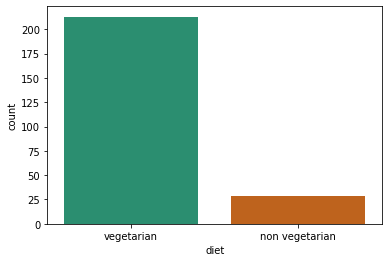

In [145]:
snb.countplot(df["diet"],palette='Dark2');

**Findings- Vegetarian diet is preferred in India and maximum data is for Vegetarian Food**

In [146]:
n=df.groupby(["diet","region"])

In [147]:
#df.groupby(["diet","region"]).groups.keys()

# 2. Variety Of Courses Available In Particular Diet

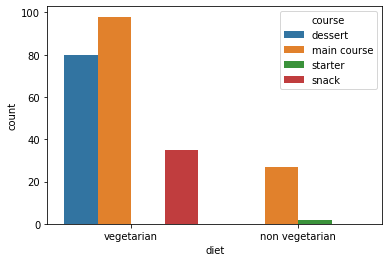

In [148]:
snb.countplot(x=df["diet"],hue=df["course"]);

***Findings- There is no starter dish in VEG and no Dessert,snack in NON-VEG***

***In both Diets, Main course has the highest liking.***

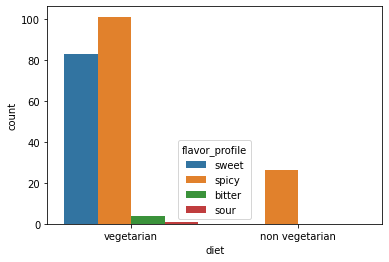

In [149]:
snb.countplot(x=df["diet"],hue=df["flavor_profile"]);

***Findings-In veg diet spicy flavour is preferred followed by sweet.***

***In non veg diet only spicy flavour is preferred***

# B. REGION

# 1.Proportion of Dishes According to Region

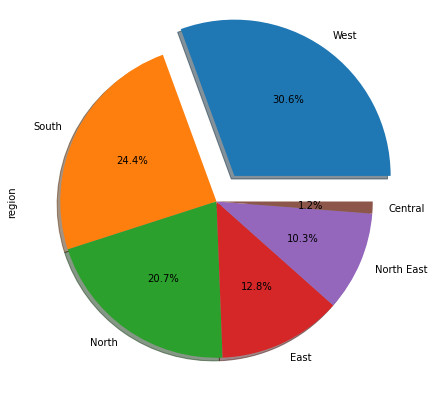

In [150]:
df["region"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(7,9),explode=[0.2,0,0,0,0,0]);

**Findings- Maximum dishes belong to West region**

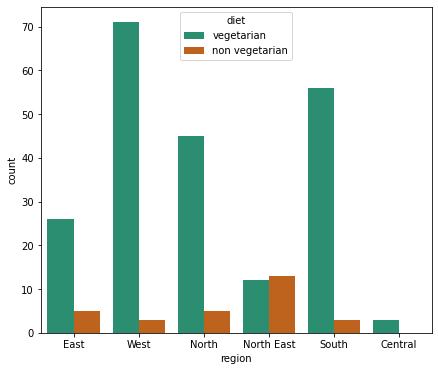

In [151]:
plt.subplots(figsize=(7,6))
snb.countplot(x=df["region"],hue=df["diet"],palette='Dark2');

***Findings- 
Central region has no non veg dish***

***In North East non veg wins over veg diet***

# 4. Flavours by Region

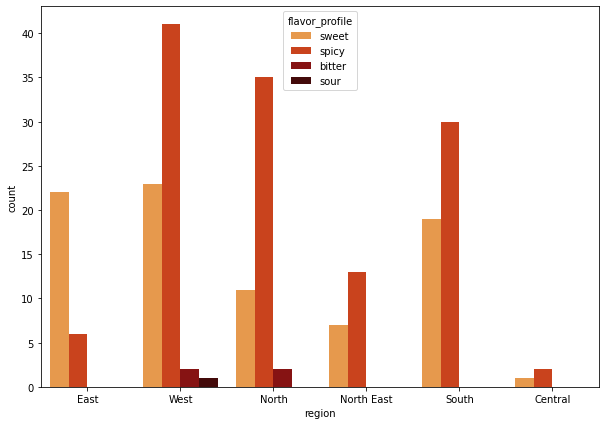

In [152]:
plt.subplots(figsize=(10,7))
snb.countplot(x=df["region"],hue=df["flavor_profile"],palette="gist_heat_r");

**Findings-
In all region, two flavours i.e., SWEET and SPICY are preferred over other flavours
In West,North,North East South and Central SPICY flavour is preferred over SWEET.***

***Only In East Region, SWEET Flavour Is preferred than SPICY
WEST is the only region having all the flavours of dish***

# 5.Type of Course By Region

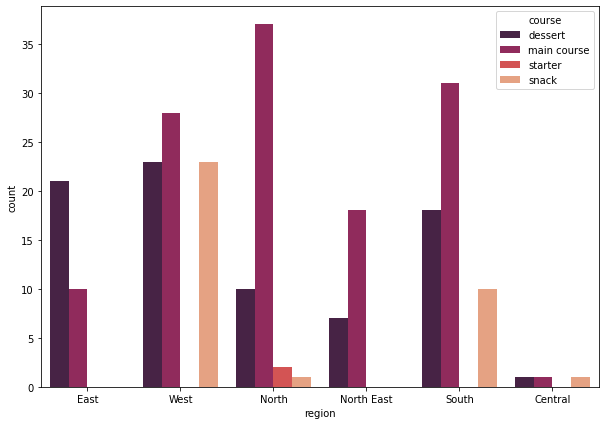

In [153]:
plt.subplots(figsize=(10,7))
snb.countplot(x=df["region"],hue=df["course"],palette="rocket");

***Findings
MAIN COURSE is Staple Course In North followed by West,South and North East***


***DESSERTS are Preferred Most in EAST followed by West,South,North,North East***


***SNACKS are preferred only in WEST,South majorly.***

# 3. Cooking time

In [154]:
# creating new dataset
df_cook = df[["name","cook_time","course","flavor_profile","region"]]
df_cook.head()

,name,cook_time,course,flavor_profile,region
0,Balu shahi,25.0,dessert,sweet,East
1,Boondi,30.0,dessert,sweet,West
2,Gajar ka halwa,60.0,dessert,sweet,North
3,Ghevar,30.0,dessert,sweet,West
4,Gulab jamun,40.0,dessert,sweet,East


# ***Average Cooking Time According To Course***

In [155]:
cook_time_mean= df_cook.groupby(["course"]).mean()
cook_time_mean.apply(lambda x: x.sort_values(ascending=False))

,cook_time
course,
dessert,48.445946
starter,37.500000
main course,35.654206
snack,33.781250


## ***Dessert dishes with min and max cooking time***

In [156]:
pd.DataFrame(df_cook[df_cook["course"]=="dessert"].agg({max,min}))

,name,cook_time,course,flavor_profile,region
min,Adhirasam,5.0,dessert,sweet,Central
max,Unni Appam,720.0,dessert,sweet,West


## ***Main Course dishes with min and max cooking time***

In [157]:
pd.DataFrame(df_cook[df_cook["course"]=="main course"].agg({max,min}))

,name,cook_time,course,region
min,Aloo gobi,10.0,main course,Central
max,Zunka,120.0,main course,West


## ***Snack dishes with min and max cooking time***

In [158]:
pd.DataFrame(df_cook[df_cook["course"]=="snack"].agg({max,min}))

,name,cook_time,course,region
min,Attu,5.0,snack,Central
max,Vada,90.0,snack,West


## ***Starter Dishes with Min and MAx time***

In [159]:
pd.DataFrame(df_cook[df_cook["course"]=="starter"].agg({max,min}))

,name,cook_time,course,flavor_profile,region
min,Chicken Tikka,30.0,starter,spicy,North
max,Tandoori Fish Tikka,45.0,starter,spicy,North
